In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

device = torch.device('cpu')

In [2]:
from anode.models_skip_step import ODEFunc

data_dim = 1  # We model 1d data to easily visualize it
hidden_dim = 16

# Create a 3-layer MLP as the ODE function f(h, t)
odefunc = ODEFunc(device, data_dim, hidden_dim, time_dependent=True)

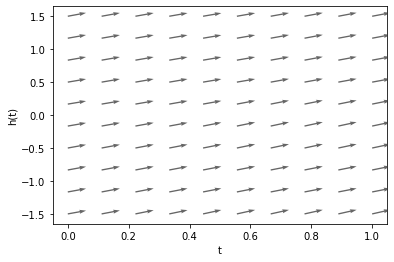

In [3]:
from viz.plots import vector_field_plt

vector_field_plt(odefunc, num_points=10, timesteps=10, 
                 h_min=-1.5, h_max=1.5)

In [4]:
from experiments.dataloaders import Data1D
from torch.utils.data import DataLoader

data_easy = Data1D(num_points=500, target_flip=False)
data_hard = Data1D(num_points=500, target_flip=True)

dataloader_easy = DataLoader(data_easy, batch_size=32, shuffle=True)
dataloader_hard = DataLoader(data_hard, batch_size=32, shuffle=True)

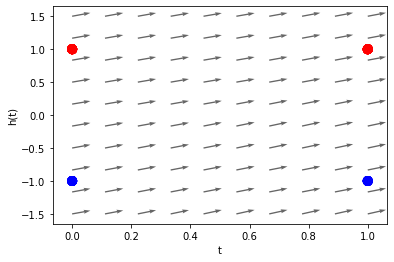

In [5]:
for inputs, targets in dataloader_easy:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

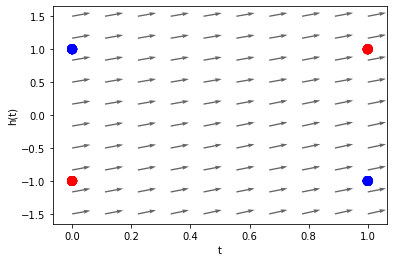

In [6]:
for inputs, targets in dataloader_hard:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

In [7]:
from anode.models_skip_step import ODEBlock
from anode.training import Trainer

data_dim = 1
hidden_dim = 16

# Create a model for the easy function
odefunc_easy = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_easy = ODEBlock(device, odefunc_easy,num_skips = 10, skip_proportion=0.50)

# Create a model for the hard function
odefunc_hard = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_hard = ODEBlock(device, odefunc_hard,num_skips=10, skip_proportion=0.50)

# Create an optimizer and trainer for easy function
optimizer_easy = torch.optim.Adam(model_easy.parameters(), lr=1e-3)
trainer_easy = Trainer(model_easy, optimizer_easy, device, print_freq=5)

# Create an optimizer and trainer for hard function
optimizer_hard = torch.optim.Adam(model_hard.parameters(), lr=5e-4)
trainer_hard = Trainer(model_hard, optimizer_hard, device, print_freq=5)

In [8]:
trainer_easy.train(dataloader_easy, num_epochs=10)


Iteration 0/16
Loss: 0.024
NFE: 178
BNFE: 0
Total NFE: 178

Iteration 5/16
Loss: 0.006
NFE: 130
BNFE: 0
Total NFE: 130

Iteration 10/16
Loss: 0.005
NFE: 154
BNFE: 0
Total NFE: 154

Iteration 15/16
Loss: 0.003
NFE: 136
BNFE: 0
Total NFE: 136
Epoch 1: 0.009

Iteration 0/16
Loss: 0.006
NFE: 166
BNFE: 0
Total NFE: 166

Iteration 5/16
Loss: 0.004
NFE: 148
BNFE: 0
Total NFE: 148

Iteration 10/16
Loss: 0.002
NFE: 160
BNFE: 0
Total NFE: 160

Iteration 15/16
Loss: 0.004
NFE: 172
BNFE: 0
Total NFE: 172
Epoch 2: 0.004

Iteration 0/16
Loss: 0.003
NFE: 136
BNFE: 0
Total NFE: 136

Iteration 5/16
Loss: 0.002
NFE: 148
BNFE: 0
Total NFE: 148

Iteration 10/16
Loss: 0.002
NFE: 196
BNFE: 0
Total NFE: 196

Iteration 15/16
Loss: 0.002
NFE: 142
BNFE: 0
Total NFE: 142
Epoch 3: 0.002

Iteration 0/16
Loss: 0.001
NFE: 154
BNFE: 0
Total NFE: 154

Iteration 5/16
Loss: 0.001
NFE: 196
BNFE: 0
Total NFE: 196

Iteration 10/16
Loss: 0.001
NFE: 184
BNFE: 0
Total NFE: 184

Iteration 15/16
Loss: 0.000
NFE: 178
BNFE: 0
To

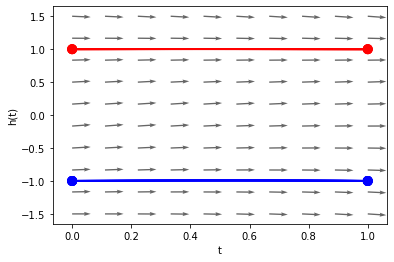

In [9]:
for inputs, targets in dataloader_easy:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_easy, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_easy)

In [10]:
trainer_hard.train(dataloader_hard, num_epochs=100)


Iteration 0/16
Loss: 1.508
NFE: 160
BNFE: 0
Total NFE: 160

Iteration 5/16
Loss: 1.490
NFE: 166
BNFE: 0
Total NFE: 166

Iteration 10/16
Loss: 1.520
NFE: 124
BNFE: 0
Total NFE: 124

Iteration 15/16
Loss: 1.495
NFE: 148
BNFE: 0
Total NFE: 148
Epoch 1: 1.506

Iteration 0/16
Loss: 1.499
NFE: 166
BNFE: 0
Total NFE: 166

Iteration 5/16
Loss: 1.496
NFE: 142
BNFE: 0
Total NFE: 142

Iteration 10/16
Loss: 1.505
NFE: 208
BNFE: 0
Total NFE: 208

Iteration 15/16
Loss: 1.487
NFE: 178
BNFE: 0
Total NFE: 178
Epoch 2: 1.493

Iteration 0/16
Loss: 1.485
NFE: 196
BNFE: 0
Total NFE: 196

Iteration 5/16
Loss: 1.470
NFE: 184
BNFE: 0
Total NFE: 184

Iteration 10/16
Loss: 1.467
NFE: 166
BNFE: 0
Total NFE: 166

Iteration 15/16
Loss: 1.491
NFE: 154
BNFE: 0
Total NFE: 154
Epoch 3: 1.480

Iteration 0/16
Loss: 1.469
NFE: 220
BNFE: 0
Total NFE: 220

Iteration 5/16
Loss: 1.460
NFE: 148
BNFE: 0
Total NFE: 148

Iteration 10/16
Loss: 1.467
NFE: 148
BNFE: 0
Total NFE: 148

Iteration 15/16
Loss: 1.475
NFE: 148
BNFE: 0
To


Iteration 0/16
Loss: 0.856
NFE: 352
BNFE: 0
Total NFE: 352

Iteration 5/16
Loss: 0.858
NFE: 274
BNFE: 0
Total NFE: 274

Iteration 10/16
Loss: 0.875
NFE: 262
BNFE: 0
Total NFE: 262

Iteration 15/16
Loss: 0.839
NFE: 268
BNFE: 0
Total NFE: 268
Epoch 33: 0.861

Iteration 0/16
Loss: 1.068
NFE: 214
BNFE: 0
Total NFE: 214

Iteration 5/16
Loss: 0.853
NFE: 340
BNFE: 0
Total NFE: 340

Iteration 10/16
Loss: 0.964
NFE: 280
BNFE: 0
Total NFE: 280

Iteration 15/16
Loss: 0.930
NFE: 268
BNFE: 0
Total NFE: 268
Epoch 34: 0.891

Iteration 0/16
Loss: 0.881
NFE: 274
BNFE: 0
Total NFE: 274

Iteration 5/16
Loss: 0.887
NFE: 322
BNFE: 0
Total NFE: 322

Iteration 10/16
Loss: 0.928
NFE: 280
BNFE: 0
Total NFE: 280

Iteration 15/16
Loss: 0.930
NFE: 304
BNFE: 0
Total NFE: 304
Epoch 35: 0.914

Iteration 0/16
Loss: 0.878
NFE: 310
BNFE: 0
Total NFE: 310

Iteration 5/16
Loss: 0.882
NFE: 298
BNFE: 0
Total NFE: 298

Iteration 10/16
Loss: 0.861
NFE: 298
BNFE: 0
Total NFE: 298

Iteration 15/16
Loss: 0.938
NFE: 274
BNFE: 0


Iteration 5/16
Loss: 0.790
NFE: 310
BNFE: 0
Total NFE: 310

Iteration 10/16
Loss: 0.903
NFE: 286
BNFE: 0
Total NFE: 286

Iteration 15/16
Loss: 0.807
NFE: 268
BNFE: 0
Total NFE: 268
Epoch 65: 0.819

Iteration 0/16
Loss: 0.844
NFE: 298
BNFE: 0
Total NFE: 298

Iteration 5/16
Loss: 0.848
NFE: 388
BNFE: 0
Total NFE: 388

Iteration 10/16
Loss: 0.791
NFE: 292
BNFE: 0
Total NFE: 292

Iteration 15/16
Loss: 0.877
NFE: 268
BNFE: 0
Total NFE: 268
Epoch 66: 0.813

Iteration 0/16
Loss: 0.849
NFE: 310
BNFE: 0
Total NFE: 310

Iteration 5/16
Loss: 0.827
NFE: 232
BNFE: 0
Total NFE: 232

Iteration 10/16
Loss: 0.797
NFE: 268
BNFE: 0
Total NFE: 268

Iteration 15/16
Loss: 0.646
NFE: 346
BNFE: 0
Total NFE: 346
Epoch 67: 0.802

Iteration 0/16
Loss: 0.724
NFE: 316
BNFE: 0
Total NFE: 316

Iteration 5/16
Loss: 0.975
NFE: 244
BNFE: 0
Total NFE: 244

Iteration 10/16
Loss: 0.908
NFE: 268
BNFE: 0
Total NFE: 268

Iteration 15/16
Loss: 0.876
NFE: 238
BNFE: 0
Total NFE: 238
Epoch 68: 0.869

Iteration 0/16
Loss: 0.826



Iteration 5/16
Loss: 0.848
NFE: 274
BNFE: 0
Total NFE: 274

Iteration 10/16
Loss: 1.100
NFE: 172
BNFE: 0
Total NFE: 172

Iteration 15/16
Loss: 0.852
NFE: 286
BNFE: 0
Total NFE: 286
Epoch 97: 0.868

Iteration 0/16
Loss: 0.813
NFE: 292
BNFE: 0
Total NFE: 292

Iteration 5/16
Loss: 0.899
NFE: 214
BNFE: 0
Total NFE: 214

Iteration 10/16
Loss: 0.847
NFE: 274
BNFE: 0
Total NFE: 274

Iteration 15/16
Loss: 0.797
NFE: 232
BNFE: 0
Total NFE: 232
Epoch 98: 0.823

Iteration 0/16
Loss: 0.932
NFE: 220
BNFE: 0
Total NFE: 220

Iteration 5/16
Loss: 0.856
NFE: 262
BNFE: 0
Total NFE: 262

Iteration 10/16
Loss: 0.883
NFE: 238
BNFE: 0
Total NFE: 238

Iteration 15/16
Loss: 0.809
NFE: 268
BNFE: 0
Total NFE: 268
Epoch 99: 0.846

Iteration 0/16
Loss: 0.878
NFE: 232
BNFE: 0
Total NFE: 232

Iteration 5/16
Loss: 0.854
NFE: 250
BNFE: 0
Total NFE: 250

Iteration 10/16
Loss: 0.772
NFE: 322
BNFE: 0
Total NFE: 322

Iteration 15/16
Loss: 0.827
NFE: 286
BNFE: 0
Total NFE: 286
Epoch 100: 0.838


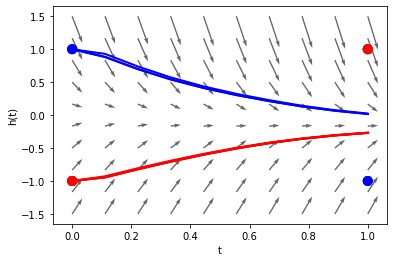

In [11]:
for inputs, targets in dataloader_hard:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_hard, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_hard)